In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import textstat

In [2]:
sns.set(style="white", font_scale=1.25, palette="deep")

In [3]:
# Reading the combined data set
sent_columns = ['neg', 'neu', 'pos','readability'] #All columns related to sentiment of the speeches
happy_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'] # All columns related to the happiness dataset
data = pd.read_csv("Data/full_dat.csv", index_col=[0,1])

In [4]:
data.head()

iso3 ISO-alpha3 Code Region Name Sub-region Name  \
Country Year                                                    
Austria 2006  AUT             AUT      Europe  Western Europe   
        2008  AUT             AUT      Europe  Western Europe   
        2010  AUT             AUT      Europe  Western Europe   
        2011  AUT             AUT      Europe  Western Europe   
        2012  AUT             AUT      Europe  Western Europe   

             Developed / Developing Countries  Session  \
Country Year                                             
Austria 2006                        Developed       61   
        2008                        Developed       63   
        2010                        Developed       65   
        2011                        Developed       66   
        2012                        Developed       67   

                                                         Speech    neg    neu  \
Country Year                                                                    
Austria 2006  “United in diversity”: \nthis motto of the Eur...  0.074  0.743   
        2008  These days, on our \ntelevision screens, image...  0.078  0.683   
        2010  The tragic \nearthquake in Haiti, the devastat...  0.060  0.698   
        2011  This year has once \nagain confirmed the impor...  0.063  0.723   
        2012  The events of recent\nmonths have illustrated ...  0.094  0.693   

                pos  Life Ladder  Log GDP per capita  Social support  \
Country Year                                                           
Austria 2006  0.183     7.122211           10.841940        0.936350   
        2008  0.239     7.180954           10.886662        0.934593   
        2010  0.242     7.302679           10.861471        0.914193   
        2011  0.214     7.470513           10.886909        0.944157   
        2012  0.213     7.400689           10.889132        0.945142   

              Healthy life expectancy at birth  Freedom to make life choices  \
Country Year                                                                   
Austria 2006                         70.760002                      0.941382   
        2008                         71.080002                      0.879069   
        2010                         71.400002                      0.895980   
        2011                         71.540001                      0.939356   
        2012                         71.680000                      0.919704   

              Generosity  Perceptions of corruption  Positive affect  \
Country Year                                                           
Austria 2006    0.302386                   0.490111         0.823105   
        2008    0.291309                   0.613625         0.832170   
        2010    0.130891                   0.546145         0.814719   
        2011    0.131578                   0.702721         0.789471   
        2012    0.117804                   0.770586         0.822248   

              Negative affect  
Country Year                   
Austria 2006         0.173812  
        2008         0.173195  
        2010         0.155793  
        2011         0.145238  
        2012         0.156675

In [5]:
speeches = data["Speech"]

data['readability'] = [textstat.dale_chall_readability_score(speech) for speech in speeches]
data['readability']

Country      Year
Austria      2006    8.88
             2008    9.15
             2010    8.96
             2011    9.19
             2012    8.79
                     ... 
Montenegro   2020    9.10
South Sudan  2014    9.47
             2015    9.02
             2016    8.45
             2017    8.73
Name: readability, Length: 1664, dtype: float64

In [6]:
data = data[sent_columns + happy_columns]

# Column information

Basic info about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1664 entries, ('Austria', 2006) to ('South Sudan', 2017)
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   neg                               1664 non-null   float64
 1   neu                               1664 non-null   float64
 2   pos                               1664 non-null   float64
 3   readability                       1664 non-null   float64
 4   Life Ladder                       1664 non-null   float64
 5   Log GDP per capita                1652 non-null   float64
 6   Social support                    1654 non-null   float64
 7   Healthy life expectancy at birth  1664 non-null   float64
 8   Freedom to make life choices      1639 non-null   float64
 9   Generosity                        1609 non-null   float64
 10  Perceptions of corruption         1565 non-null   float64
 11  Positive affect                   16

More numeric info about each column

In [8]:
data.describe()

,neg,neu,pos,readability,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1652.000000,1654.000000,1664.000000,1639.000000,1609.000000,1565.000000,1645.000000,1650.000000
mean,0.080663,0.740073,0.179239,9.059886,5.460666,9.361959,0.812139,63.423119,0.745001,-0.002921,0.746757,0.711446,0.268695
std,0.030034,0.038727,0.032635,0.729985,1.135965,1.159358,0.121807,7.596992,0.144166,0.160917,0.190924,0.108065,0.081285
min,0.011000,0.599000,0.073000,6.750000,2.375092,6.635322,0.290184,32.299999,0.257534,-0.335040,0.035198,0.321690,0.095490
25%,0.059000,0.714750,0.157750,8.580000,4.610970,8.449862,0.746523,58.670000,0.650378,-0.118097,0.692892,0.627798,0.207799
50%,0.078000,0.741000,0.180000,8.990000,5.354053,9.483177,0.839411,65.300003,0.766716,-0.024666,0.804879,0.725461,0.260161
75%,0.098000,0.766000,0.200000,9.490000,6.294377,10.310630,0.908301,68.704998,0.861427,0.084854,0.874849,0.802440,0.319142
max,0.268000,0.880000,0.294000,12.200000,8.018934,11.648169,0.987343,77.099998,0.985178,0.698099,0.983276,0.943621,0.599335


# Cleaning data

In [9]:
nans = data.isnull().sum().sort_values(ascending=False)
relative = nans/data.shape[0]
pd.concat([nans, relative], axis=1, keys=['Total missing', 'Percent missing'])

,Total missing,Percent missing
Perceptions of corruption,99,0.059495
Generosity,55,0.033053
Freedom to make life choices,25,0.015024
Positive affect,19,0.011418
Negative affect,14,0.008413
Log GDP per capita,12,0.007212
Social support,10,0.006010
neg,0,0.000000
neu,0,0.000000
pos,0,0.000000


The amount of missing data is fairly low. So we can allow ourselves to just remove all rows containing missing data.

In [10]:
data.dropna(inplace=True) # Dropp all rows containing missing data

# Normalizing the data

In [11]:
def scale_df(dataframe, columns):
    # Normalizes all given columns in a dataframe
    for col in columns:
        dataframe[col] = (dataframe[col] - dataframe[col].min()) / (dataframe[col].max() - dataframe[col].min())

# scale_df(data, sent_columns + happy_columns) # Normalize all relevant columns

# Distribution of columns

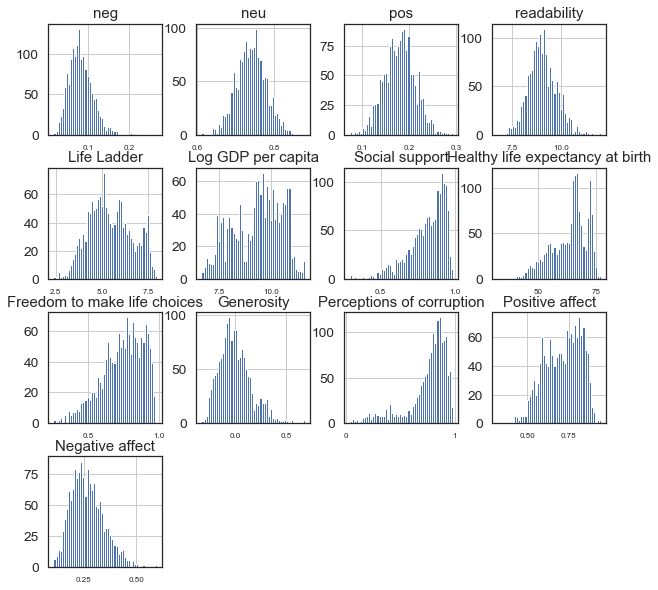

In [12]:
data.hist(figsize=(10, 10), bins=50, xlabelsize=8);
plt.savefig('Images/distribution_data.png')

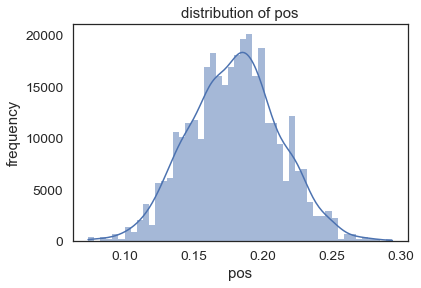

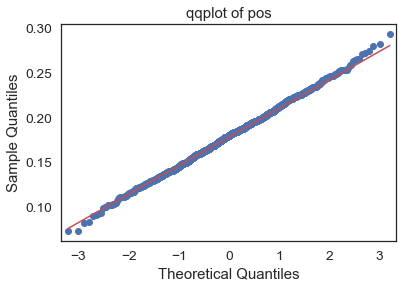

P-value is: 0.840423047542572
So the data follow a normal distribution.


In [23]:
def view_normal_distibution(dataframe, col_name, n_bins=50):
    # Vizualises the normality of a given column. also performs a shapiro-wilk test
    x = dataframe[col_name]
#     sns.distplot(x, bins=n_bins)
    sns.histplot(x, bins=n_bins, kde=True, stat="frequency", linewidth=0)
    plt.ylabel('frequency')
    plt.xlabel(col_name)
    plt.title('distribution of ' + col_name)
    plt.show()
    
    sm.qqplot(x, line ='q')
    plt.title('qqplot of ' + col_name)
    plt.show()
    
    p_value = stats.shapiro(x)[1]
    print("P-value is: " + str(p_value))
    if p_value > 0.05:
        print("So the data follow a normal distribution.")
    else:
        print("So the data does not follow a normal distribution.")
    
    
    
view_normal_distibution(data, 'pos')

TODO: Some columns dont follow the normal distribution. However i think we can make them fit a normal distribution using transforms

"Neg" is positively skewed and can be transformed using sqrt(x)

In [14]:
data['neg'] = np.sqrt(data['neg'])

# Correlation of columns

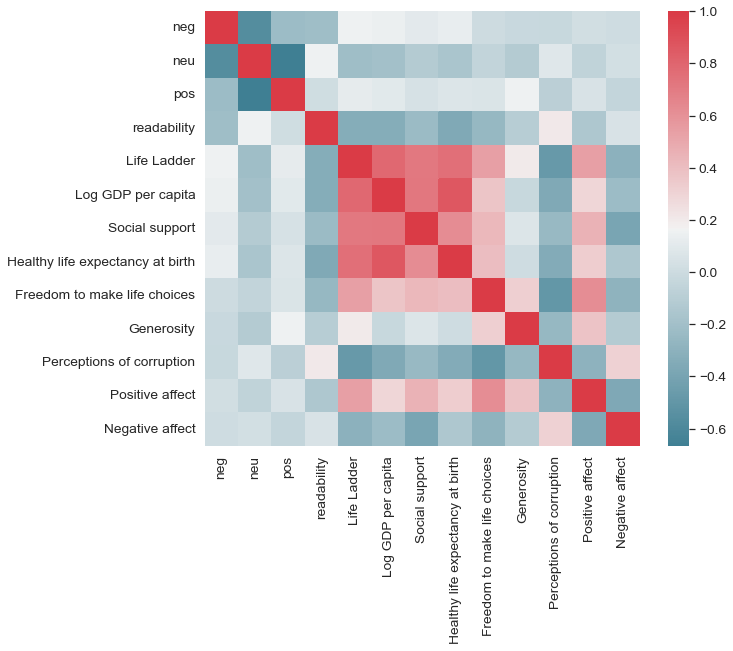

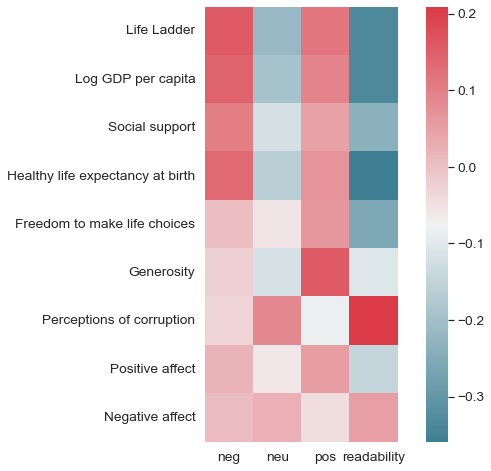

In [15]:
data_cor = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_cor, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('Images/correlation_heatmap.png')


cor_sub = data_cor.drop(sent_columns)
cor_sub = cor_sub.drop(happy_columns, axis=1)
f, ax = plt.subplots(figsize=(10, 8))
corr = cor_sub
sns.heatmap(cor_sub, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('Images/correlation_heatmap_small.png')

# Exploring some of the relationships

"Life Ladder" and "Log GDP per capita" both seem to have a relatively strong correlation with all the sentiment scores. Lets explore that some more

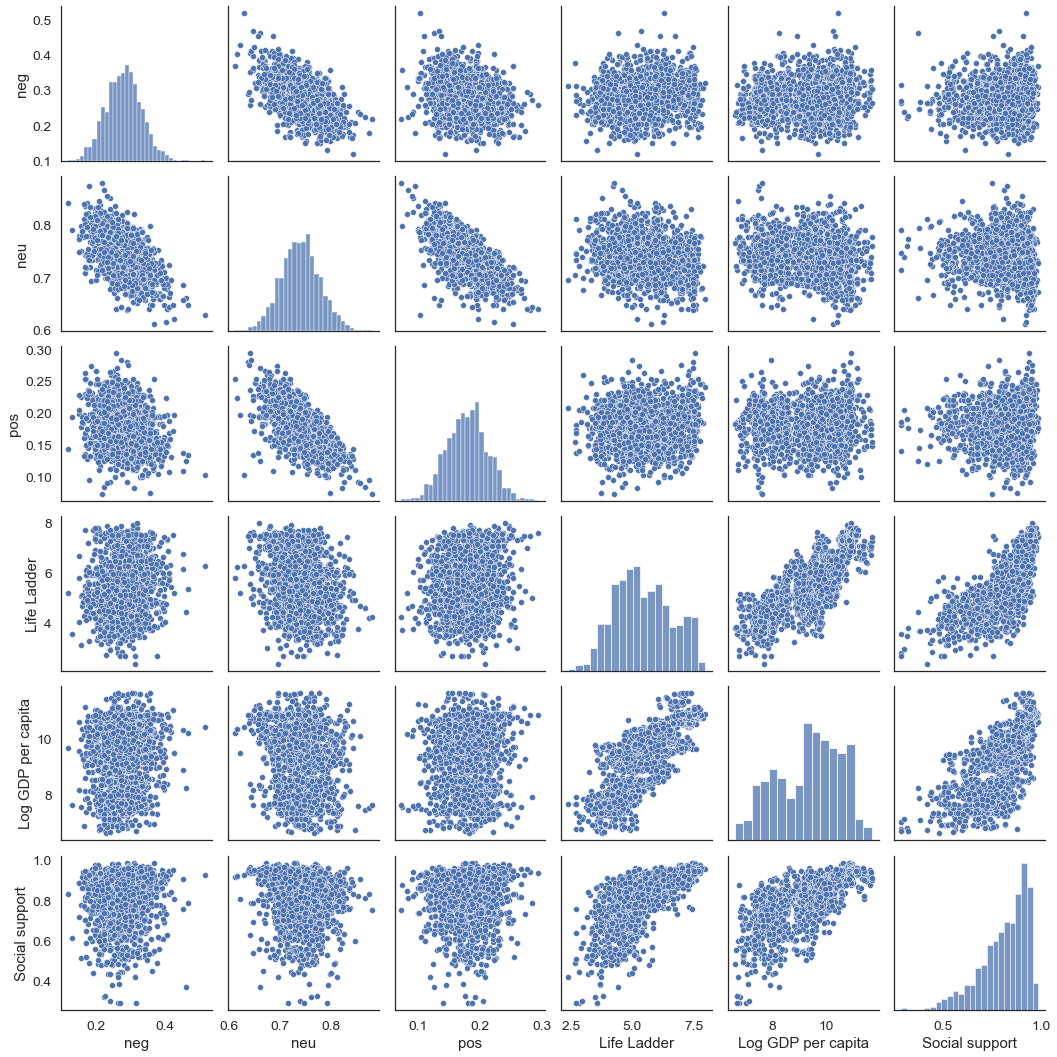

In [16]:

cols = ["neg", "neu", "pos", "Life Ladder", "Log GDP per capita", "Social support"]
t = sns.pairplot(data[cols], height = 2.5)
plt.savefig('Images/relationships_between_data.png')

Thats maybe a little on the large side. We dont really need to compare data within the datasets. Lets remove those:

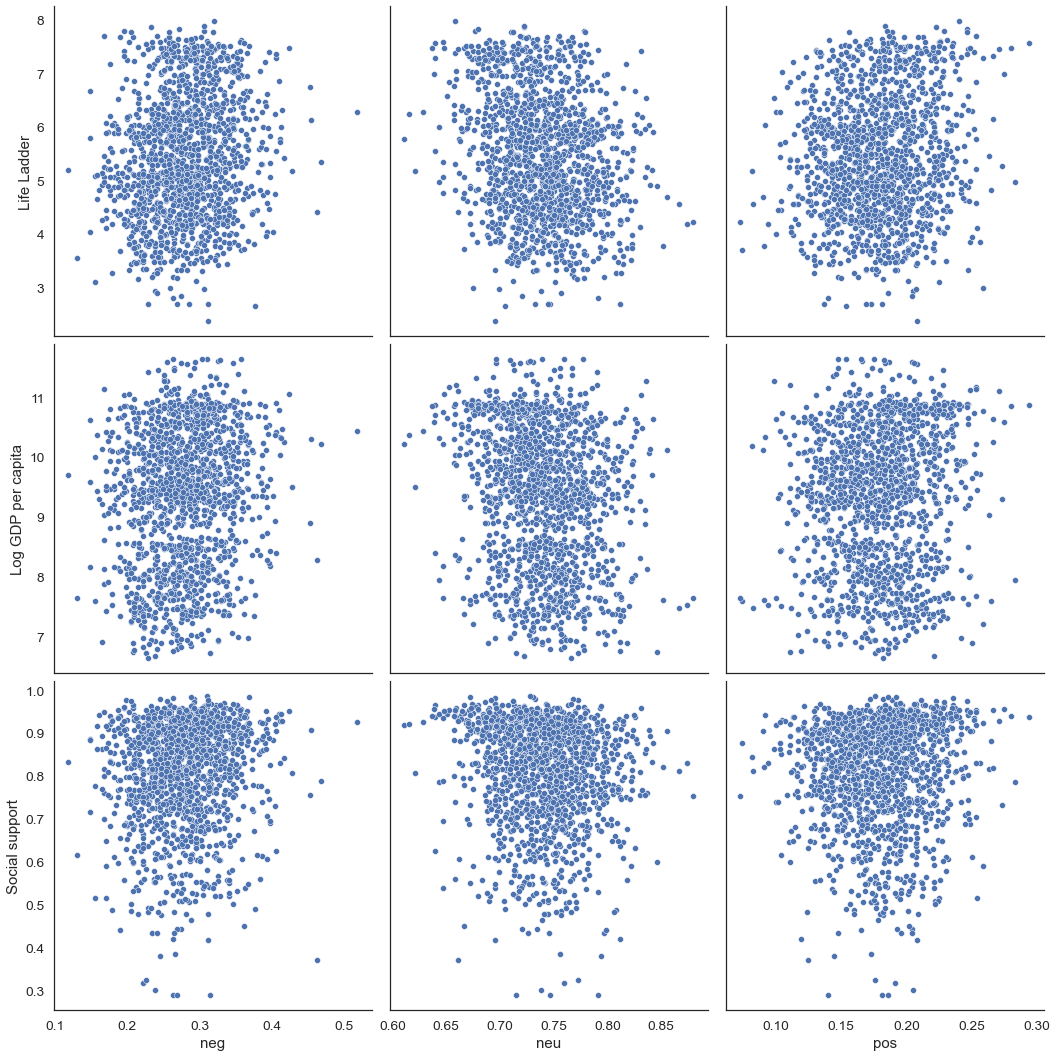

In [17]:

s = ["neg", "neu", "pos"]
h = ["Life Ladder", "Log GDP per capita", "Social support"]
t = sns.pairplot(data, x_vars=s, y_vars=h, height=5)
plt.savefig('Images/more_relationships_between_data.png')

Well, that looks like a blob. Maybe the correlation is only due to the outliers?